In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('creditcard_2023.csv')

In [3]:
data.shape

(568630, 31)

In [4]:
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
data.drop('id',axis=1,inplace=True)

In [7]:
data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(568629, 30)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568629 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568629 non-null  float64
 1   V2      568629 non-null  float64
 2   V3      568629 non-null  float64
 3   V4      568629 non-null  float64
 4   V5      568629 non-null  float64
 5   V6      568629 non-null  float64
 6   V7      568629 non-null  float64
 7   V8      568629 non-null  float64
 8   V9      568629 non-null  float64
 9   V10     568629 non-null  float64
 10  V11     568629 non-null  float64
 11  V12     568629 non-null  float64
 12  V13     568629 non-null  float64
 13  V14     568629 non-null  float64
 14  V15     568629 non-null  float64
 15  V16     568629 non-null  float64
 16  V17     568629 non-null  float64
 17  V18     568629 non-null  float64
 18  V19     568629 non-null  float64
 19  V20     568629 non-null  float64
 20  V21     568629 non-null  float64
 21  V22     56

In [11]:
data['Class'].value_counts()

0    284315
1    284314
Name: Class, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Amount', ylabel='Count'>

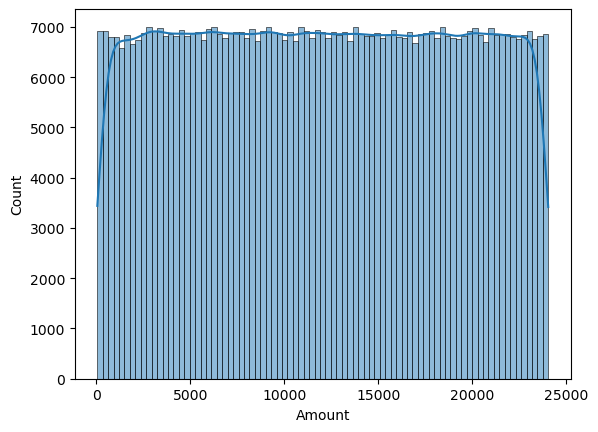

In [19]:
sns.histplot(data['Amount'],kde=True)

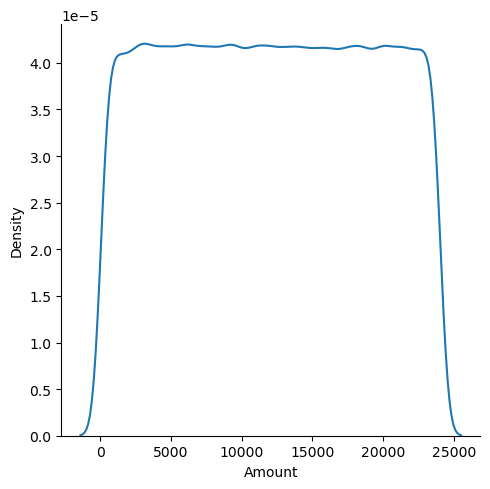

In [21]:
sns.displot(data['Amount'],kind='kde')

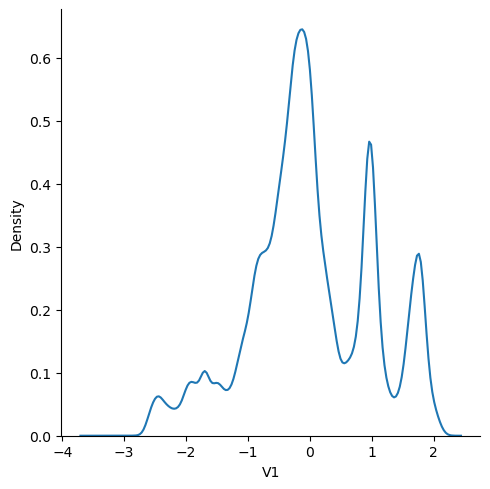

In [22]:
sns.displot(data['V1'],kind='kde')

<Axes: xlabel='V1', ylabel='Count'>

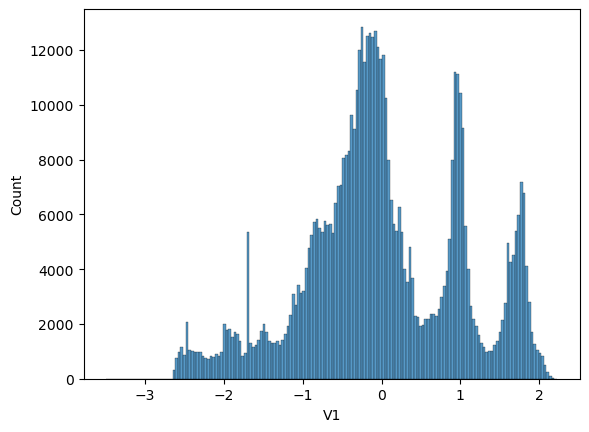

In [23]:
sns.histplot(data['V1'])

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
ss = StandardScaler()

In [28]:
x = data.drop('Class',axis=1)

In [29]:
y = data['Class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=98)

In [33]:
x_train = ss.fit_transform(x_train)

In [34]:
x_test = ss.transform(x_test)

In [36]:
x_train

array([[-0.5314775 , -0.04215684,  0.65472094, ...,  0.18409491,
        -0.18697893, -1.08705867],
       [ 1.72589032, -0.26392022, -0.20287818, ..., -0.21239867,
        -0.10467734, -0.78876367],
       [-0.34768523, -1.21889505,  1.50015651, ..., -0.30547198,
         0.11310868,  0.88194589],
       ...,
       [ 0.15351928, -0.14334102, -0.46409331, ...,  0.30388306,
        -0.18425553, -1.50813121],
       [-0.4443633 , -1.3500341 ,  1.42101917, ..., -0.32326192,
        -0.30326599,  1.06113996],
       [-1.25744685,  0.30542695, -0.97502137, ...,  0.63766807,
         0.2683522 , -0.49090656]])

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()

In [41]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
pred = rf.predict(x_test)

In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56909
           1       1.00      1.00      1.00     56817

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
cv = cross_val_score(rf,x,y,cv=5,n_jobs=-1)

In [48]:
cv_mean = cv.mean()

In [49]:
cv_mean

0.9997977593571837